In [ ]:
print("Primera Práctica de Laboratorio — Curso de Deep Learning DNNs, Regularización y Redes Convolucionales (CNNs)")
print("-------------------------------------------------")
print("Universidad Casa Grande")
print("Maestría en Ciencia de Datos e Inteligencia Artificial")
print("Catedra : Deep Learning and Neural Networks Architectures")
print("Practica 1: Redes Convolucionales (CNNs) para Clasificación de Imágenes")
print("Estudiante : Rodrigo Cárdenas Cueva\n\n\n")

Primera Práctica de Laboratorio — Curso de Deep Learning DNNs, Regularización y Redes Convolucionales (CNNs)
-------------------------------------------------
Universidad Casa Grande
Maestría en Ciencia de Datos e Inteligencia Artificial
Catedra : Deep Learning and Neural Networks Architectures
Practica 1: Redes Convolucionales (CNNs) para Clasificación de Imágenes
Estudiante : Rodrigo Cárdenas Cueva





PASO 1: Carga del Dataset para Clasificación Binaria

In [ ]:
# Cargamos las librerías
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Verificar si hay GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Usando dispositivo: {device}")

✅ Usando dispositivo: cuda


In [ ]:
from google.colab import files

# Subimos manualmente el archivo dataset.zip
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
import os

# Descomprimimos en una carpeta llamada 'data'
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# Verifica la estructura
print(os.listdir("data/dataset/training_set"))


['cats', 'dogs']


PASO 2: Cargar el dataset y preparar el DataLoader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformaciones para preprocesamiento
transform = transforms.Compose([
    transforms.Resize((128, 128)),             # Redimensionamos a 128x128
    transforms.ToTensor(),                     # Convertimos a tensor
    transforms.Normalize([0.5]*3, [0.5]*3)      # Normalizamos RGB en rango [-1, 1]
])

# Ruta al dataset
train_dir = "data/dataset/training_set"

# Dataset con estructura de carpetas por clase
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# DataLoader para iterar por lotes
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Verificamos las clases
print("Clases detectadas:", train_dataset.classes)
print("Total de imágenes:", len(train_dataset))


Clases detectadas: ['cats', 'dogs']
Total de imágenes: 8000


In [ ]:
# PASO 2: Transformación alternativa con Data Augmentation (para entrenar una variante más)
transform_augmented = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomResizedCrop(128, scale=(0.8, 1.0)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

# Dataset y loader con data augmentation
train_dataset_augmented = ImageFolder(root=train_dir, transform=transform_augmented)
train_loader_augmented = DataLoader(train_dataset_augmented, batch_size=32, shuffle=True)

# Entrenar con el nuevo dataset
model_aug = SimpleCNN().to(device)
optimizer_aug = torch.optim.Adam(model_aug.parameters(), lr=0.001)
train_model(model_aug, train_loader_augmented, criterion, optimizer_aug, epochs=10, device=device, label_hist="CNN_Augmented")


PASO 3: Definir y Entrenar una CNN Sencilla para Clasificación Binaria
1. Definir una arquitectura de red convolucional simple.
2. Configurar la función de pérdida y el optimizador.
3. Entrenar la red por algunas épocas sobre el dataset cargado.
4. Monitorear la pérdida y exactitud (accuracy) durante el entrenamiento.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Definimos una red CNN básica
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # 128x128 -> pooling 2 veces -> 32x32
        self.fc2 = nn.Linear(128, 1)  # Salida binaria

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (128x128 -> 64x64)
        x = self.pool(F.relu(self.conv2(x)))  # (64x64 -> 32x32)
        x = x.view(-1, 32 * 32 * 32)          # Flatten
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))        # Salida entre [0, 1]
        return x

# Instanciamos el modelo
model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
#Configuramos Périda y Optimizador
import torch.optim as optim

criterion = nn.BCELoss()  # Para salida binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
print("Primera Práctica de Laboratorio — Curso de Deep Learning DNNs, Regularización y Redes Convolucionales (CNNs)")
print("-------------------------------------------------")
print("Universidad Casa Grande")
print("Maestría en Ciencia de Datos e Inteligencia Artificial")
print("Catedra : Deep Learning and Neural Networks Architectures")
print("Practica 1: Redes Convolucionales (CNNs) para Clasificación de Imágenes")
print("Estudiante : Rodrigo Cárdenas Cueva\n\n\n")

Primera Práctica de Laboratorio — Curso de Deep Learning DNNs, Regularización y Redes Convolucionales (CNNs)
-------------------------------------------------
Universidad Casa Grande
Maestría en Ciencia de Datos e Inteligencia Artificial
Catedra : Deep Learning and Neural Networks Architectures
Practica 1: Redes Convolucionales (CNNs) para Clasificación de Imágenes
Estudiante : Rodrigo Cárdenas Cueva





PASO 1: Carga del Dataset para Clasificación Binaria

In [ ]:
# Cargamos las librerías
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt

# Verificar si hay GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"✅ Usando dispositivo: {device}")

✅ Usando dispositivo: cpu


In [ ]:
from google.colab import files

# Subimos manualmente el archivo dataset.zip
uploaded = files.upload()

Saving dataset.zip to dataset.zip


In [ ]:
import zipfile
import os

# Descomprimir en una carpeta llamada 'data'
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("data")

# Verifica la estructura
print(os.listdir("data/dataset/training_set"))


['cats', 'dogs']


PASO 2: Cargar el dataset y preparar el DataLoader

In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformaciones para preprocesamiento
transform = transforms.Compose([
    transforms.Resize((128, 128)),             # Redimensionamos a 128x128
    transforms.ToTensor(),                     # Convertimos a tensor
    transforms.Normalize([0.5]*3, [0.5]*3)      # Normalizamos RGB en rango [-1, 1]
])

# Ruta al dataset
train_dir = "data/dataset/training_set"

# Dataset con estructura de carpetas por clase
train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)

# DataLoader para iterar por lotes
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Verificamos las clases
print("Clases detectadas:", train_dataset.classes)
print("Total de imágenes:", len(train_dataset))


Clases detectadas: ['cats', 'dogs']
Total de imágenes: 8000


PASO 3: Definir y Entrenar una CNN Sencilla para Clasificación Binaria
1. Definir una arquitectura de red convolucional simple.
2. Configurar la función de pérdida y el optimizador.
3. Entrenar la red por algunas épocas sobre el dataset cargado.
4. Monitorear la pérdida y exactitud (accuracy) durante el entrenamiento.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Definimos una red CNN básica
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)  # 128x128 -> pooling 2 veces -> 32x32
        self.fc2 = nn.Linear(128, 1)  # Salida binaria

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # (128x128 -> 64x64)
        x = self.pool(F.relu(self.conv2(x)))  # (64x64 -> 32x32)
        x = x.view(-1, 32 * 32 * 32)          # Flatten
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))        # Salida entre [0, 1]
        return x

# Instanciamos el modelo
model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=32768, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=1, bias=True)
)


In [ ]:
#Configuramos Périda y Optimizador
import torch.optim as optim

criterion = nn.BCELoss()  # Para salida binaria
optimizer = optim.Adam(model.parameters(), lr=0.001)

PASO 4: Almacenar métricas de entrenamiento del modelo base

In [ ]:
# Diccionario para guardar métricas
history = {
    "SimpleCNN_color": {
        "loss": [],
        "accuracy": []
    }
}

In [ ]:
# Entrenamiento por 10 epoch
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        predicted = (outputs > 0.5).float()
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = correct / total

    # Guardamos las métricas
    history["SimpleCNN_color"]["loss"].append(epoch_loss)
    history["SimpleCNN_color"]["accuracy"].append(epoch_acc)

    print(f"Epoch {epoch+1}/{epochs} - Pérdida: {epoch_loss:.4f} - Accuracy: {epoch_acc:.4f}")


Epoch 1/10 - Pérdida: 0.0146 - Accuracy: 0.9960
Epoch 2/10 - Pérdida: 0.0291 - Accuracy: 0.9911
Epoch 3/10 - Pérdida: 0.0203 - Accuracy: 0.9942
Epoch 4/10 - Pérdida: 0.0050 - Accuracy: 0.9984
Epoch 5/10 - Pérdida: 0.0041 - Accuracy: 0.9990
Epoch 6/10 - Pérdida: 0.0010 - Accuracy: 0.9999
Epoch 7/10 - Pérdida: 0.0009 - Accuracy: 0.9999
Epoch 8/10 - Pérdida: 0.0002 - Accuracy: 1.0000
Epoch 9/10 - Pérdida: 0.0001 - Accuracy: 1.0000
Epoch 10/10 - Pérdida: 0.0001 - Accuracy: 1.0000


PASO 5: Visualización de métricas del modelo base

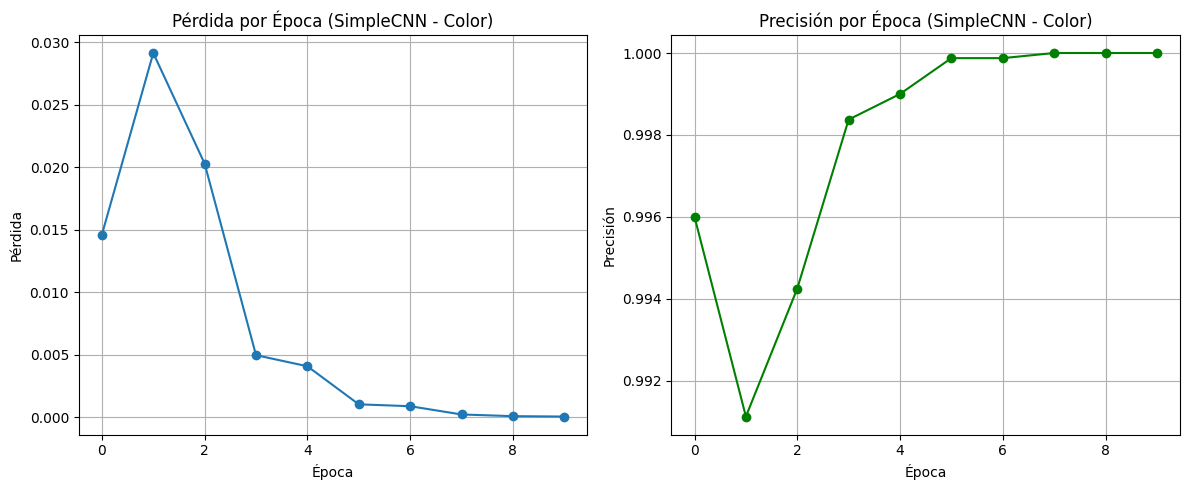

In [ ]:
# Gráficos de pérdida y precisión
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history["SimpleCNN_color"]["loss"], marker='o')
plt.title("Pérdida por Época (SimpleCNN - Color)")
plt.xlabel("Época")
plt.ylabel("Pérdida")
plt.grid(True)

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history["SimpleCNN_color"]["accuracy"], marker='o', color='green')
plt.title("Precisión por Época (SimpleCNN - Color)")
plt.xlabel("Época")
plt.ylabel("Precisión")
plt.grid(True)

plt.tight_layout()
plt.show()


PASO 6: Función general train_model() para reutilizar

In [ ]:
def train_model(model, train_loader, criterion, optimizer, epochs, device, label_hist):
    history[label_hist] = {"loss": [], "accuracy": []}

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).float().unsqueeze(1)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        epoch_loss = running_loss / len(train_loader)
        epoch_acc = correct / total
        history[label_hist]["loss"].append(epoch_loss)
        history[label_hist]["accuracy"].append(epoch_acc)

        print(f"[{label_hist}] Epoch {epoch+1}/{epochs} - Loss: {epoch_loss:.4f} - Acc: {epoch_acc:.4f}")


PASO 7: Comparar con imágenes en escala de grises

In [ ]:
# Transformación para imágenes en escala de grises
transform_gray = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # solo 1 canal
])

# Dataset y DataLoader para imágenes en escala de grises
train_dataset_gray = ImageFolder(root=train_dir, transform=transform_gray)
train_loader_gray = DataLoader(train_dataset_gray, batch_size=32, shuffle=True)


In [ ]:
#Nueva arquitectura: SimpleCNN_Gray con 1 canal de entrada
class SimpleCNN_Gray(nn.Module):
    def __init__(self):
        super(SimpleCNN_Gray, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 128x128 -> 64x64
        x = self.pool(F.relu(self.conv2(x)))  # 64x64 -> 32x32
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [ ]:
#Enrtrenamos el nuevo DATALOADER
model_gray = SimpleCNN_Gray().to(device)
optimizer_gray = torch.optim.Adam(model_gray.parameters(), lr=0.001)
criterion = nn.BCELoss()

train_model(model_gray, train_loader_gray, criterion, optimizer_gray, epochs=10, device=device, label_hist="SimpleCNN_gray")


[SimpleCNN_gray] Epoch 1/10 - Loss: 0.6922 - Acc: 0.5519
[SimpleCNN_gray] Epoch 2/10 - Loss: 0.6254 - Acc: 0.6516
[SimpleCNN_gray] Epoch 3/10 - Loss: 0.5378 - Acc: 0.7309
[SimpleCNN_gray] Epoch 4/10 - Loss: 0.4412 - Acc: 0.7946
[SimpleCNN_gray] Epoch 5/10 - Loss: 0.3417 - Acc: 0.8445
[SimpleCNN_gray] Epoch 6/10 - Loss: 0.2309 - Acc: 0.9056
[SimpleCNN_gray] Epoch 7/10 - Loss: 0.1166 - Acc: 0.9603
[SimpleCNN_gray] Epoch 8/10 - Loss: 0.0519 - Acc: 0.9878
[SimpleCNN_gray] Epoch 9/10 - Loss: 0.0192 - Acc: 0.9969
[SimpleCNN_gray] Epoch 10/10 - Loss: 0.0045 - Acc: 1.0000


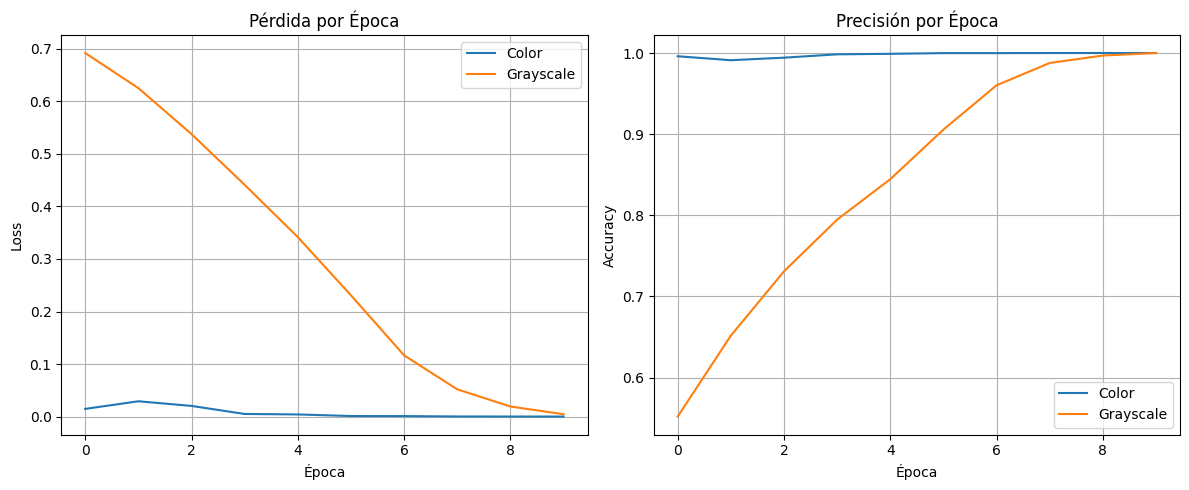

In [ ]:
# Comparación color vs grayscale
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history["SimpleCNN_color"]["loss"], label="Color")
plt.plot(history["SimpleCNN_gray"]["loss"], label="Grayscale")
plt.title("Pérdida por Época")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history["SimpleCNN_color"]["accuracy"], label="Color")
plt.plot(history["SimpleCNN_gray"]["accuracy"], label="Grayscale")
plt.title("Precisión por Época")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


PASO 8: Regularización con Dropout

In [ ]:
#Definimos una CNN con Dropout
class CNN_Dropout(nn.Module):
    def __init__(self):
        super(CNN_Dropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))     # 128x128 -> 64x64
        x = self.pool(F.relu(self.conv2(x)))     # 64x64 -> 32x32
        x = x.view(-1, 32 * 32 * 32)
        x = self.dropout(F.relu(self.fc1(x)))    # Aplicamos Dropout
        x = torch.sigmoid(self.fc2(x))
        return x


In [ ]:
#Entrenamos el modelo
model_dropout = CNN_Dropout().to(device)
optimizer_dropout = torch.optim.Adam(model_dropout.parameters(), lr=0.001)

train_model(model_dropout, train_loader, criterion, optimizer_dropout, epochs=10, device=device, label_hist="CNN_Dropout_color")


[CNN_Dropout_color] Epoch 1/10 - Loss: 0.6350 - Acc: 0.6385
[CNN_Dropout_color] Epoch 2/10 - Loss: 0.5229 - Acc: 0.7459
[CNN_Dropout_color] Epoch 3/10 - Loss: 0.4316 - Acc: 0.8050
[CNN_Dropout_color] Epoch 4/10 - Loss: 0.3538 - Acc: 0.8452
[CNN_Dropout_color] Epoch 5/10 - Loss: 0.2688 - Acc: 0.8851
[CNN_Dropout_color] Epoch 6/10 - Loss: 0.1887 - Acc: 0.9237
[CNN_Dropout_color] Epoch 7/10 - Loss: 0.1321 - Acc: 0.9506
[CNN_Dropout_color] Epoch 8/10 - Loss: 0.0904 - Acc: 0.9664
[CNN_Dropout_color] Epoch 9/10 - Loss: 0.0746 - Acc: 0.9736
[CNN_Dropout_color] Epoch 10/10 - Loss: 0.0554 - Acc: 0.9795


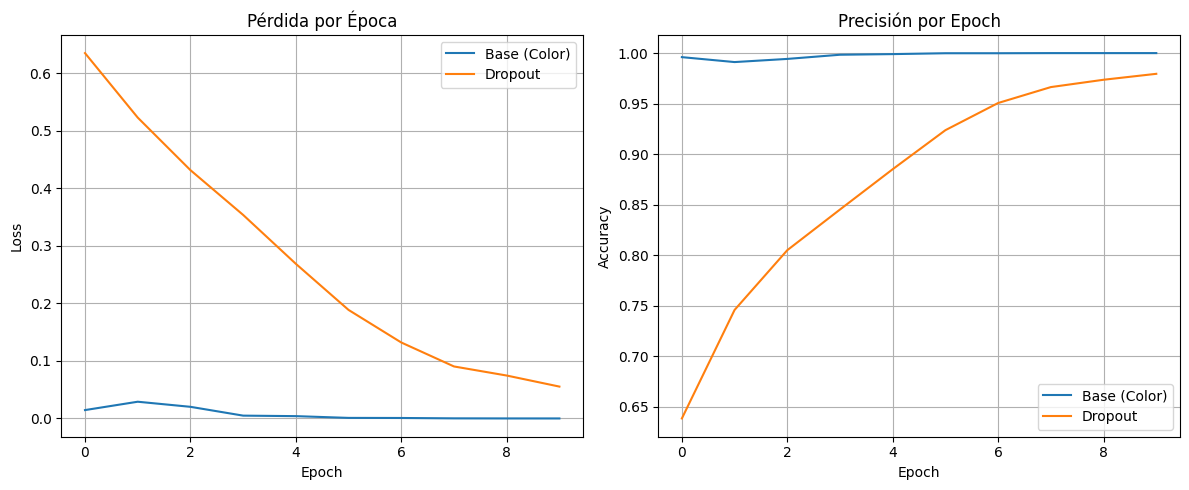

In [ ]:
#Comparamos con el modelo Base
# Comparación con Dropout
plt.figure(figsize=(12, 5))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history["SimpleCNN_color"]["loss"], label="Base (Color)")
plt.plot(history["CNN_Dropout_color"]["loss"], label="Dropout")
plt.title("Pérdida por Época")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history["SimpleCNN_color"]["accuracy"], label="Base (Color)")
plt.plot(history["CNN_Dropout_color"]["accuracy"], label="Dropout")
plt.title("Precisión por Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


 PASO 9: Regularización con BatchNorm

In [ ]:
# Ahora vamos con CNN BatchNorm
class CNN_BatchNorm(nn.Module):
    def __init__(self):
        super(CNN_BatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)

        self.fc1 = nn.Linear(32 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, 1)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # 128x128 -> 64x64
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # 64x64 -> 32x32
        x = x.view(-1, 32 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x


In [ ]:
#Entrenamos el modelo
model_bn = CNN_BatchNorm().to(device)
optimizer_bn = torch.optim.Adam(model_bn.parameters(), lr=0.001)

train_model(model_bn, train_loader, criterion, optimizer_bn, epochs=10, device=device, label_hist="CNN_BatchNorm_color")


[CNN_BatchNorm_color] Epoch 1/10 - Loss: 49.8404 - Acc: 0.4991
[CNN_BatchNorm_color] Epoch 2/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 3/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 4/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 5/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 6/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 7/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 8/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 9/10 - Loss: 50.0000 - Acc: 0.5000
[CNN_BatchNorm_color] Epoch 10/10 - Loss: 50.0000 - Acc: 0.5000
